In [1]:
import pandas as pd
import numpy as np
from cpca import *


In [2]:
%matplotlib inline

In [3]:
d = []
with open("../raw_data/DATA_T_RESULT.txt","r",encoding="utf-8") as fs:
    lines = fs.readlines()
    for line in lines:
        d.append(eval(str(line)))
pd_data = pd.DataFrame()
for i in d:
    i_pd = pd.DataFrame(i.get("entities"))
    pd_data = pd.concat([pd_data, i_pd],axis=0,ignore_index=True)

In [4]:
pd_data.head()

,digest,eventLevel,keywords,name
0,上海市食品药品监督管理局抽检8大类食品，抽检样品共计1107批次，其中合格1103批次、不合...,中性,,上海市食品药品监督管理局
1,中国质量新闻网讯 据成都市工商行政管理局官网发布的2017年二季度学生用品质量抽检结果，“金...,负向,,汕头市潮南区峡山万年星文具厂
2,中国质量新闻网讯 据成都市工商行政管理局官网发布的2017年二季度学生用品质量抽检结果，“金...,负向,,浙江金丝猴文具有限公司
3,中国网财经8月2日讯 唐山市食品药品监督管理局官网近日发布关于河北省食品安全监督抽检(唐...,负向,,唐山乡伊香生态农业开发有限公司
4,中国网财经8月2日讯 唐山市食品药品监督管理局官网近日发布关于河北省食品安全监督抽检信息的公...,中性,,唐山市食品药品监督管理局


In [5]:
names_list = pd_data["name"].tolist()

In [6]:
df = transform(names_list,cut=False)

In [7]:
df.head()

,区,市,省,地址
0,,上海市,上海市,食品药品监督管理局
1,潮南区,汕头市,广东省,峡山万年星文具厂
2,,,浙江省,金丝猴文具有限公司
3,,唐山市,河北省,乡伊香生态农业开发有限公司
4,,唐山市,河北省,食品药品监督管理局


In [8]:
df.replace("","无法确定",inplace=True)
df.replace("内蒙古","内蒙古自治区",inplace=True)
df.replace("新疆维吾尔自治区","新疆维吾尔族自治区",inplace=True)

In [9]:
from cpca_drawers import *
draw_locations(df, "df.html")

In [10]:
plot_df = df.groupby("省").count().reset_index()

In [11]:
plot_df["count"] = plot_df["区"]

In [12]:
mp = {"上海市": "华东","江苏省":"华东","浙江省":"华东","安徽省":"华东","福建省":"华东","江西省":"华东","山东省":"华东","台湾省":"华东",
     "广东省":"华南","广西省":"华南","海南省":"华南","香港":"华南","澳门特区":"华南","广西壮族自治区":"华南",
     "河北省":"华北","山西省":"华北","北京市":"华北","天津市":"华北","内蒙古":"华北","内蒙古自治区":"华北",
     "湖北省":"华中","湖南省":"华中","河南省":"华中",
     "辽宁省":"东北","吉林省":"东北","黑龙江省":"东北",
     "四川省":"西南","云南省":"西南","贵州省":"西南","重庆市":"西南","西藏自治区":"西南",
     "宁夏回族自治区":"西北","新疆维吾尔族自治区":"西北","新疆维吾尔自治区":"西北","青海省":"西北","陕西省":"西北","甘肃省":"西北",
     "无法确定":"无法确定"}

In [13]:
plot_df.head()

,省,区,市,地址,count
0,上海市,577,577,577,577
1,云南省,436,436,436,436
2,内蒙古自治区,139,139,139,139
3,北京市,255,255,255,255
4,吉林省,326,326,326,326


In [14]:
sum(plot_df["count"].tolist())

14109

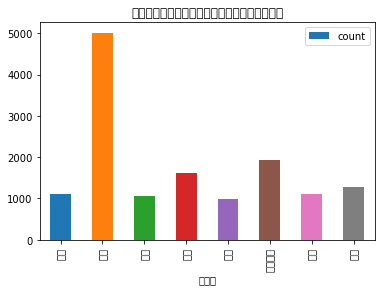

In [15]:
plot_df["地理区"] = plot_df["省"].apply(lambda x: mp.get(x))
pd_plot_df = plot_df[["地理区","count"]].groupby("地理区").sum().reset_index()
pd_plot_df.plot(x="地理区",y="count",kind="bar",title="数据集中所涉及公司在全国范围上的地理区分布")

In [16]:
#DataFrame来绘制我们的单词向量
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体：解决plot不能显示中文问题,否则会显示成方块
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

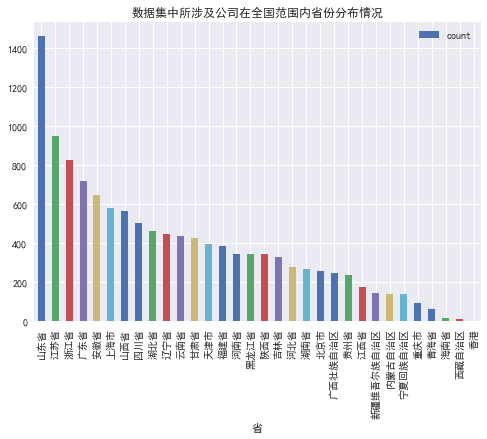

In [17]:
plot_df = plot_df[~plot_df["省"].str.contains("确定")]
plot_df.sort_values("count",inplace=True,ascending=False)
plot_df.plot(x="省",y="count",kind="bar",title="数据集中所涉及公司在全国范围内省份分布情况")

In [18]:
raw_plot_df = pd.DataFrame({
    "省":["广东省","浙江省","江苏省","上海市","山东省","北京市","河北省","福建省","河南省","辽宁省","湖南省",
        "湖北省","四川省","安徽省","天津市","陕西省","江西省","广西壮族自治区","山西省","重庆市","香港","黑龙江省",
        "云南省","吉林省","海南省","贵州省","内蒙古自治区","新疆维吾尔族自治区","甘肃省","青海省","宁夏回族自治区",
        "西藏自治区"],
    "count":[1273956,517542,396321,369179,328903,269549,210444,163095,147150,124159,92976,
             110864,104957,78561,75086,74621,67659,59156,58500,52696,50654,45107,38562,34486,32702,22893,
            26762,21241,19372,9664,8987,2915]
})

In [19]:
new_plot_df = pd.DataFrame({
    "省":['山东省','江苏省','浙江省','广东省','安徽省','上海市','山西省','四川省','湖北省','辽宁省','云南省','甘肃省',
         '天津市','福建省','河南省','黑龙江省','陕西省','吉林省','河北省','湖南省','北京市','广西壮族自治区','贵州省',
         '江西省','新疆维吾尔族自治区', '内蒙古自治区','宁夏回族自治区','重庆市','青海省','海南省','西藏自治区','香港'],
    "count":[1460,949,826,718,645,577,564,499,460,446,436,423,395,383,344,342,341,326,274,263,255,
             247,237,173,143,139,138,93,58,13,8,1]
})

In [20]:
raw_new = raw_plot_df.merge(new_plot_df, how="left",on="省")
raw_new["rate"] = raw_new["count_x"] / sum(raw_new["count_x"].tolist())
raw_new["new_count"] = 14109 * raw_new["rate"]
raw_new["count"] = raw_new["new_count"].astype(np.int)

In [21]:
raw_new.sort_values("rate",inplace=True,ascending=False)

In [22]:
raw_new_count = raw_new[["count"]]

In [23]:
p = 1.0*raw_new_count.cumsum()/raw_new_count.sum()

In [24]:
p["省"] = raw_new["省"]

In [37]:
raw_new[["省","count"]].to_excel("E:\\硕士毕业论文\\图表\\count_sheng.xlsx")

In [25]:
# p[["省","count"]].to_excel("E:\\硕士毕业论文\\图表\\lei.xlsx")

In [26]:
# raw_new[["省","count"]].to_excel("E:\\硕士毕业论文\\图表\\new_plot.xlsx")
# raw_new[["省","count_x"]].to_excel("E:\\硕士毕业论文\\图表\\raw_plot.xlsx")

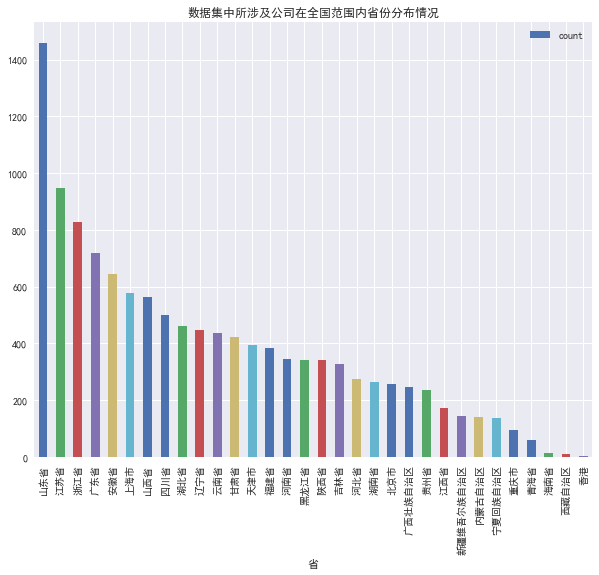

In [27]:
new_plot_df.sort_values("count",inplace=True,ascending=False)
new_plot_df.plot(x="省",y="count",kind="bar",title="数据集中所涉及公司在全国范围内省份分布情况",figsize=(10,8))

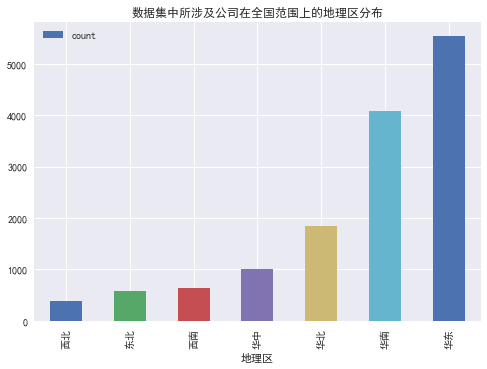

In [28]:
raw_new["地理区"] = raw_new["省"].apply(lambda x: mp.get(x))
pd_plot_df = raw_new[["地理区","count"]].groupby("地理区").sum().reset_index()
pd_plot_df.sort_values("count",inplace=True,ascending=True)
pd_plot_df.plot(x="地理区",y="count",kind="bar",title="数据集中所涉及公司在全国范围上的地理区分布")

In [29]:
# pd_plot_df.to_excel("E:\\硕士毕业论文\\图表\\daqu.xlsx")

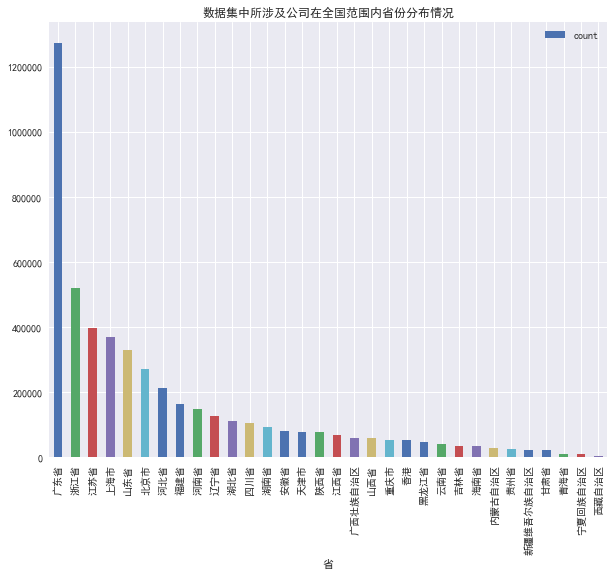

In [30]:
raw_plot_df.sort_values("count",inplace=True,ascending=False)
raw_plot_df.plot(x="省",y="count",kind="bar",title="数据集中所涉及公司在全国范围内省份分布情况",figsize=(10,8))

In [31]:
sentiment_data = pd_data.groupby("eventLevel").count().reset_index()
sentiment_data["count"] = sentiment_data["name"]
sentiment_data["plority"] = sentiment_data["eventLevel"]
sentiment_data = sentiment_data[["plority","count"]]

In [32]:
# sentiment_data.to_excel("E:\\硕士毕业论文\\图表\\sen_data.xlsx")

In [33]:
sentiment_data

,plority,count
0,中性,2698
1,正向,4776
2,负向,6667


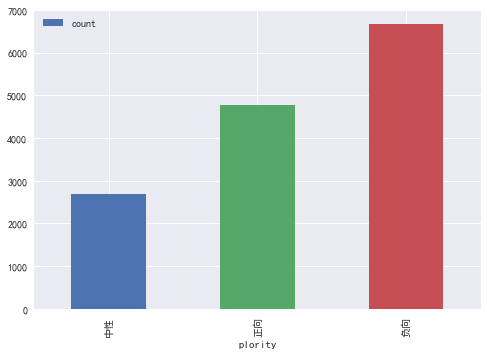

In [34]:
sentiment_data.plot(x="plority",y="count",kind="bar")